## Column Transformer

In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,MinMaxScaler,OneHotEncoder

In [29]:
df = sns.load_dataset('iris')

In [31]:
df.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
86,6.7,3.1,4.7,1.5,versicolor
132,6.4,2.8,5.6,2.2,virginica


In [33]:
from sklearn.compose import ColumnTransformer

In [55]:
ct = ColumnTransformer(
    [
        ('trf_1',StandardScaler(),['sepal_length']),
        ('trf_2',MinMaxScaler(),['sepal_width']),
        ('trf_3',StandardScaler(),['petal_length']),
        ('trf_4',StandardScaler(),['petal_width']),
        ('trf_5',OrdinalEncoder(categories=[['setosa','versicolor','virginica']]),['species'])
    ]
    
)

In [53]:
pd.DataFrame(ct.fit_transform(df),columns=df.columns)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,0.625000,-1.340227,-1.315444,0.0
1,-1.143017,0.416667,-1.340227,-1.315444,0.0
2,-1.385353,0.500000,-1.397064,-1.315444,0.0
3,-1.506521,0.458333,-1.283389,-1.315444,0.0
4,-1.021849,0.666667,-1.340227,-1.315444,0.0
...,...,...,...,...,...
145,1.038005,0.416667,0.819596,1.448832,2.0
146,0.553333,0.208333,0.705921,0.922303,2.0
147,0.795669,0.416667,0.819596,1.053935,2.0
148,0.432165,0.583333,0.933271,1.448832,2.0


In [41]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [65]:
cte_1= ColumnTransformer(
    [
        ('trf_1',StandardScaler(),['sepal_length']),
        ('trf_2',MinMaxScaler(),['sepal_width']),
        ('trf_3',StandardScaler(),['petal_length']),
        ('trf_4',StandardScaler(),['petal_width']),
        ('trf_5',OneHotEncoder(handle_unknown='ignore',sparse_output= False),['species'])
    ]
    
)

In [75]:
trans_data = cte_1.fit_transform(df)

In [81]:
ohe_1 = cte_1.named_transformers_['trf_5']

In [95]:
col =  ['sepal_length','sepal_width','petal_length','petal_width'] +list(ohe_1.get_feature_names_out())

In [97]:
df_n =pd.DataFrame(trans_data,columns=col)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,-0.900681,0.625000,-1.340227,-1.315444,1.0,0.0,0.0
1,-1.143017,0.416667,-1.340227,-1.315444,1.0,0.0,0.0
2,-1.385353,0.500000,-1.397064,-1.315444,1.0,0.0,0.0
3,-1.506521,0.458333,-1.283389,-1.315444,1.0,0.0,0.0
4,-1.021849,0.666667,-1.340227,-1.315444,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,1.038005,0.416667,0.819596,1.448832,0.0,0.0,1.0
146,0.553333,0.208333,0.705921,0.922303,0.0,0.0,1.0
147,0.795669,0.416667,0.819596,1.053935,0.0,0.0,1.0
148,0.432165,0.583333,0.933271,1.448832,0.0,0.0,1.0


In [99]:
df = pd.read_csv('concrete_data.csv')

In [101]:
df.sample(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
93,374.0,189.2,0.0,170.1,10.1,926.1,756.7,7,46.20
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [105]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_17788\3714519656.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_17788\3714519656.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\lab4.LAB4PR\AppData\Local\Temp\

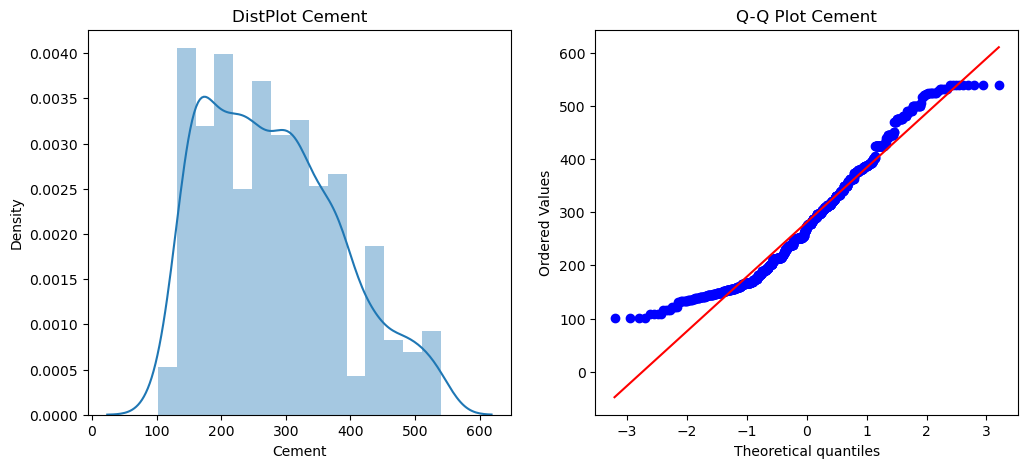

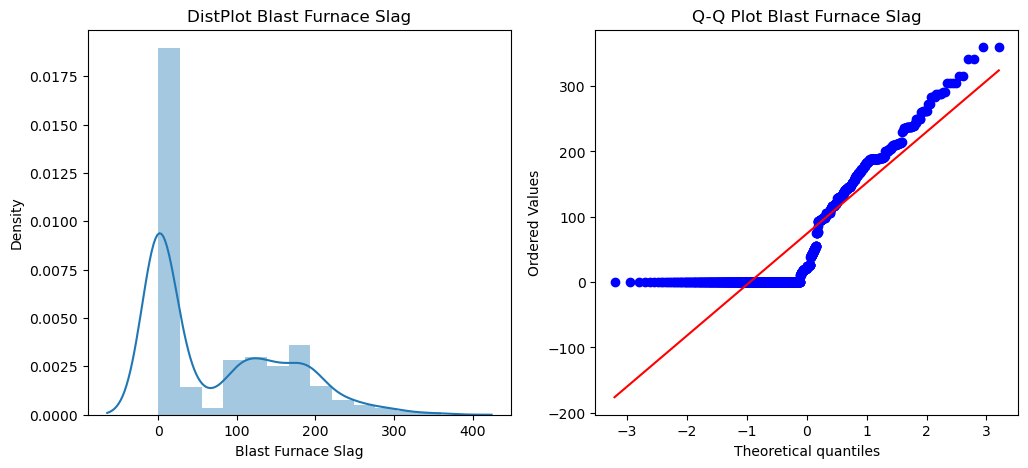

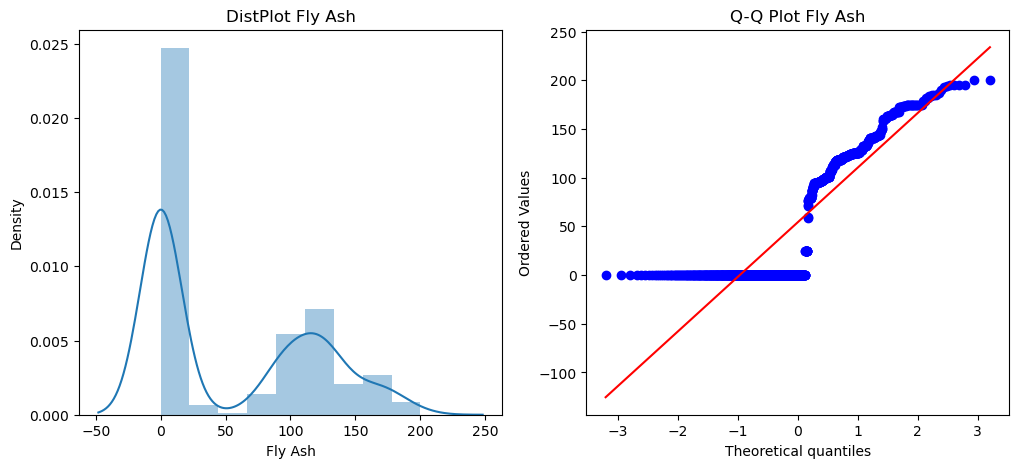

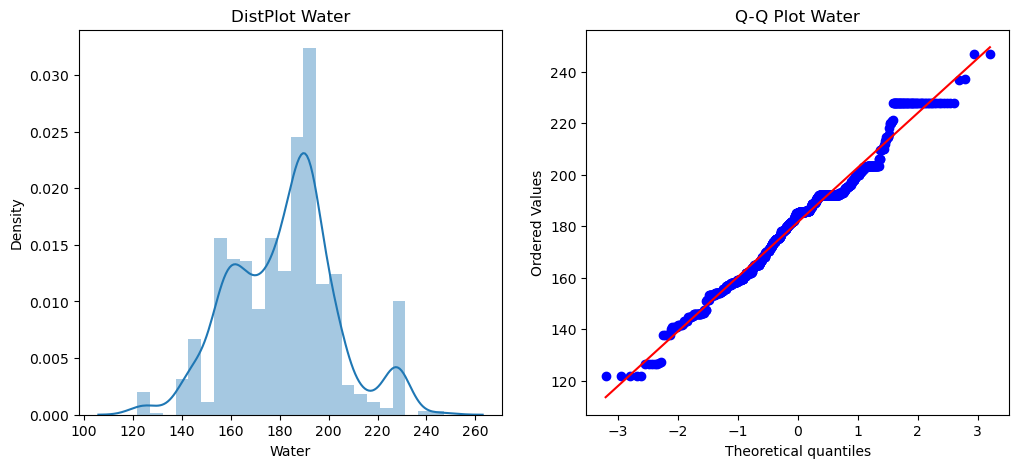

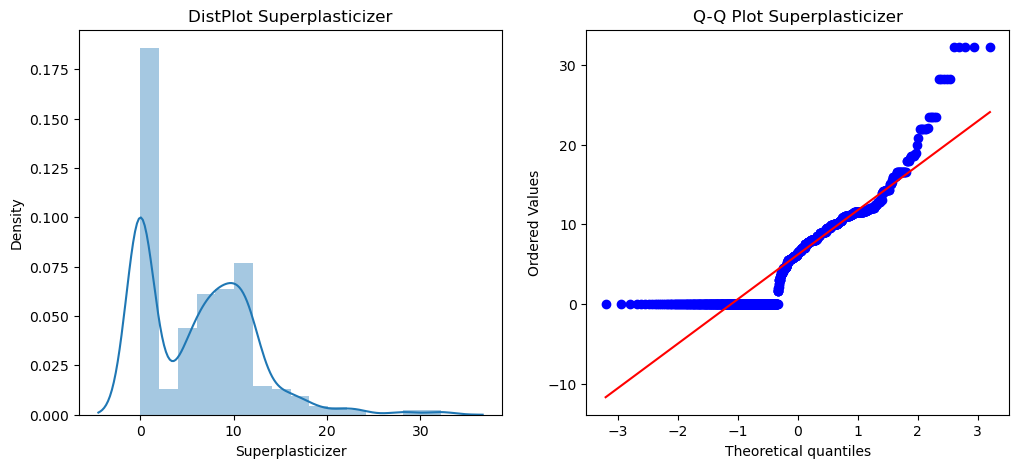

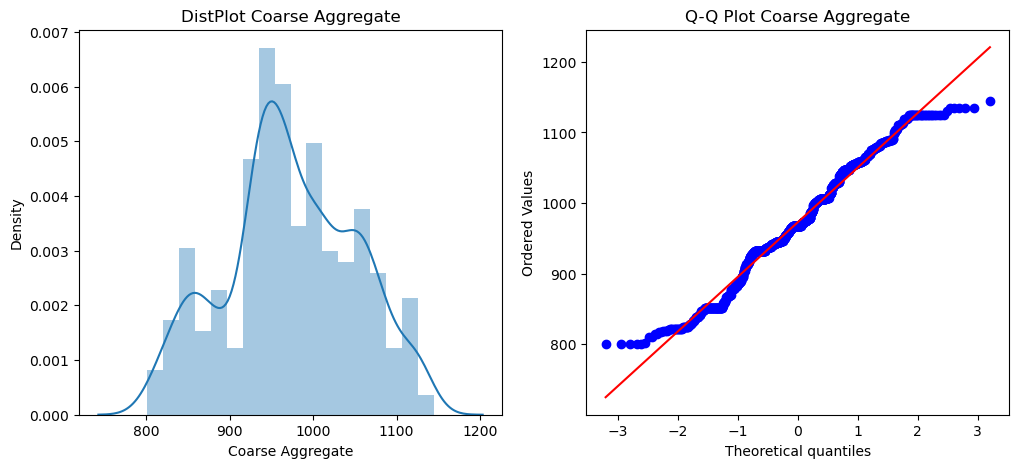

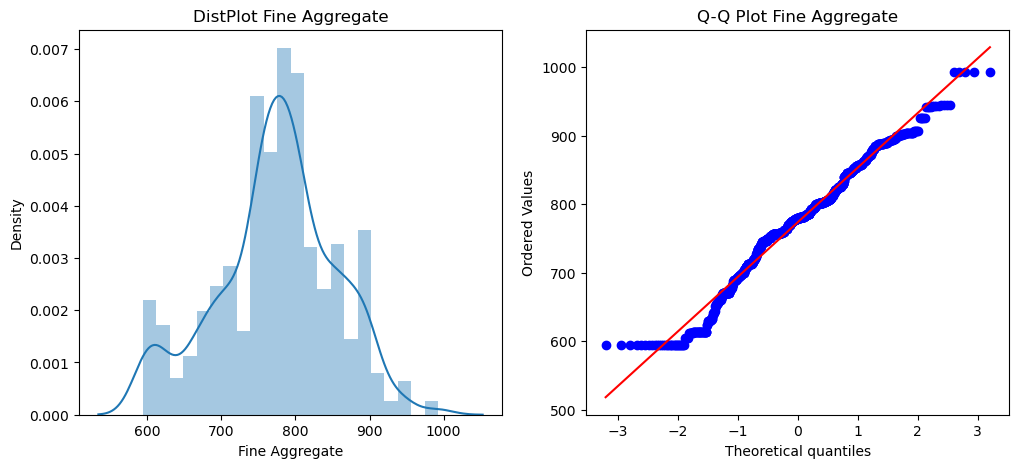

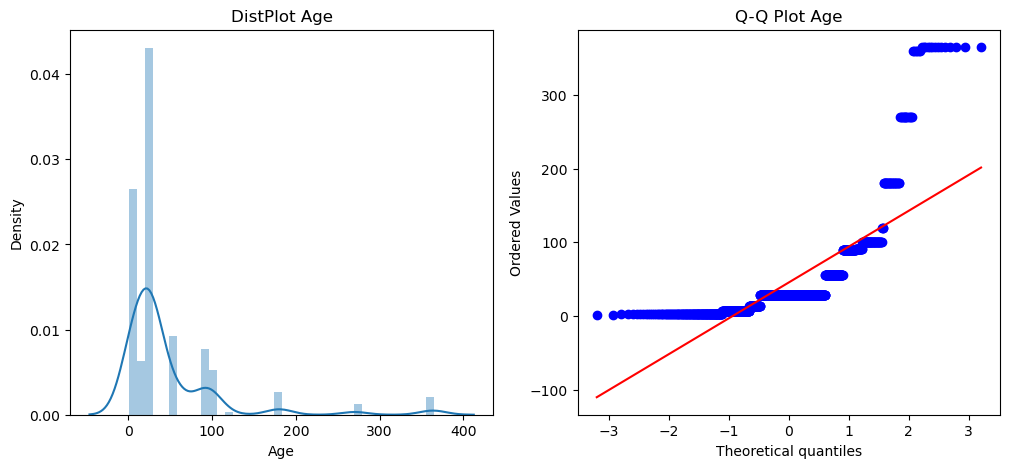

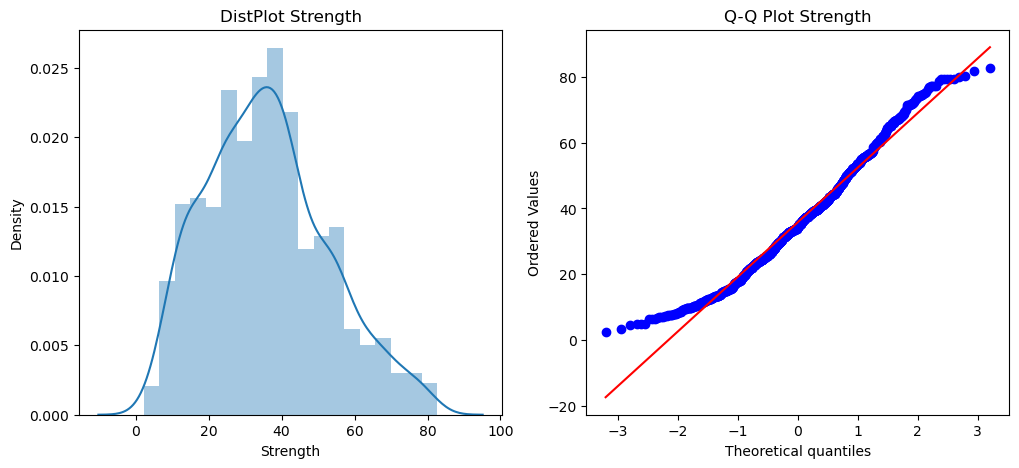

In [127]:
for col in df.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title("DistPlot "+col)
    
    sns.distplot(df[col])

    plt.subplot(122)
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.title("Q-Q Plot "+col)



In [129]:
from sklearn.preprocessing import PowerTransformer

In [139]:
pt_box = PowerTransformer(method='box-cox')

In [163]:
pd.DataFrame(pt_box.fit_transform(df+0.000000001),columns=df.columns).iloc[15:20,:]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
15,0.977806,-1.087672,-0.90533,2.136472,-1.307793,-0.530498,-1.275857,1.131427,1.018452
16,-1.603047,0.981295,-0.90533,0.496971,-1.307793,0.953094,0.383931,1.131427,0.305945
17,0.684835,0.811838,-0.90533,2.136472,-1.307793,-0.530498,-1.275857,2.433424,1.176439
18,0.977806,0.902126,-0.90533,2.136472,-1.307793,-0.530498,-2.085750,1.131427,0.372834
19,1.616129,-1.087672,-0.90533,2.136472,-1.307793,-0.530498,-2.085750,1.764856,0.485750


In [161]:
df.iloc[15:20,:]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
15,380.0,0.0,0.0,228.0,0.0,932.0,670.0,90,52.91
16,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,90,39.36
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
18,380.0,95.0,0.0,228.0,0.0,932.0,594.0,90,40.56
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62


In [165]:
df_box_cox = pd.DataFrame(pt_box.fit_transform(df+0.000000001),columns=df.columns)

In [167]:
pt_box.lambdas_

array([ 0.17227109,  0.0192405 , -0.02355153,  0.80956821,  0.07095143,
        1.12916734,  1.82962476,  0.04897536,  0.57927686])

C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_17788\3973564772.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_17788\3973564772.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_box_cox[col])
C:\Users\lab4.LAB4PR\AppData\Lo

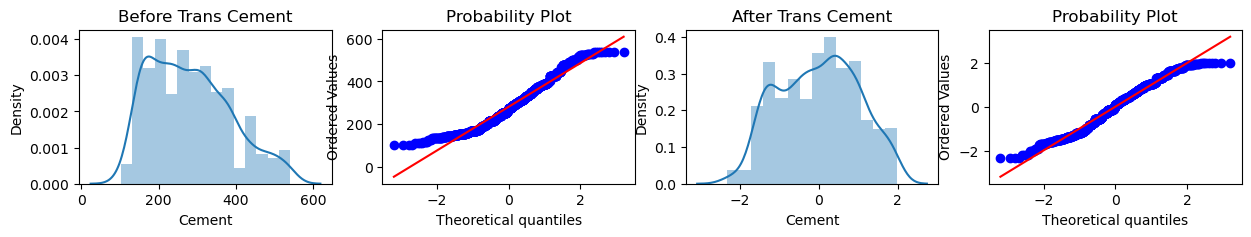

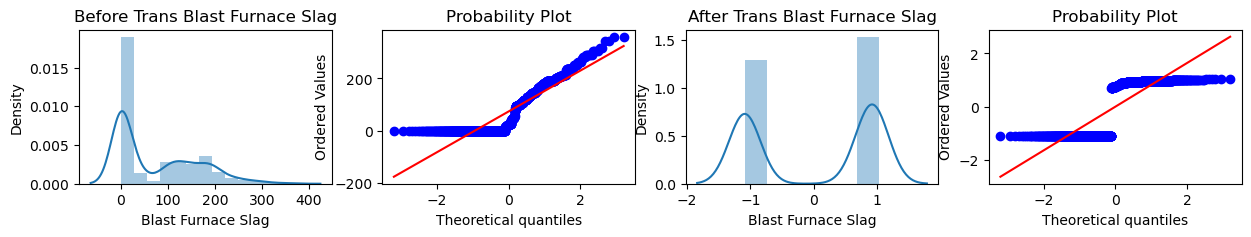

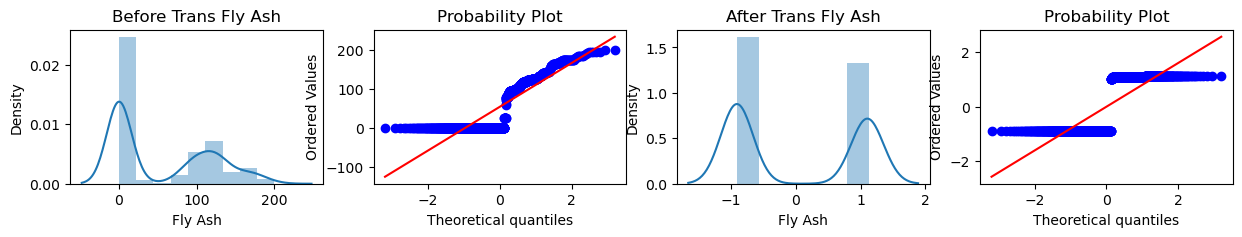

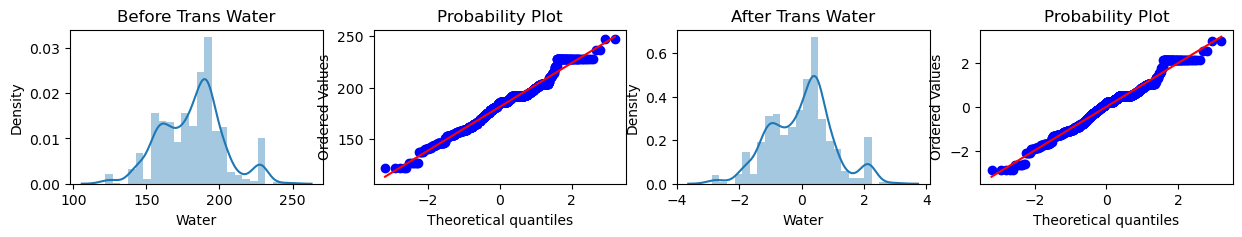

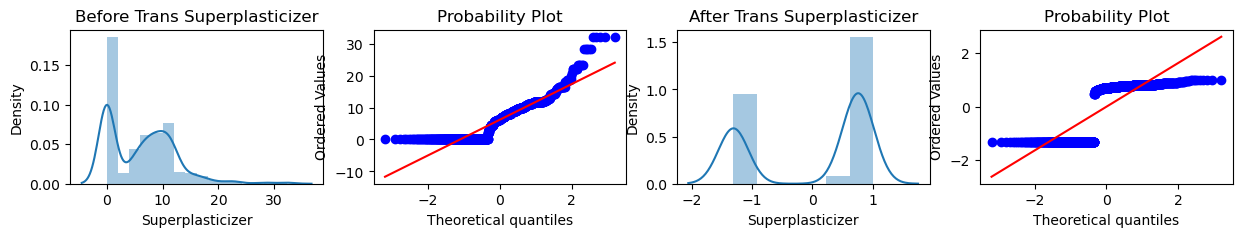

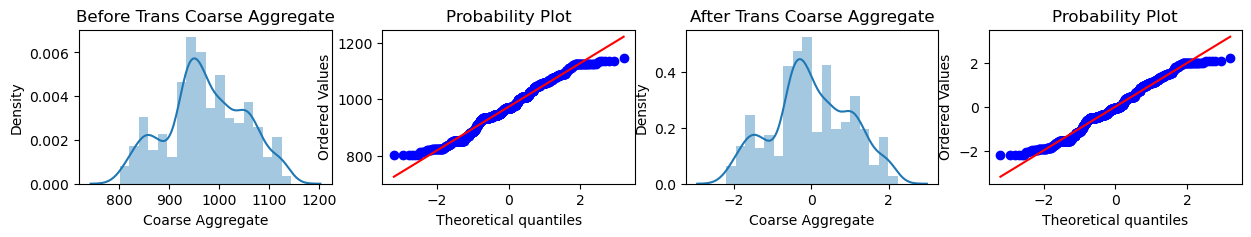

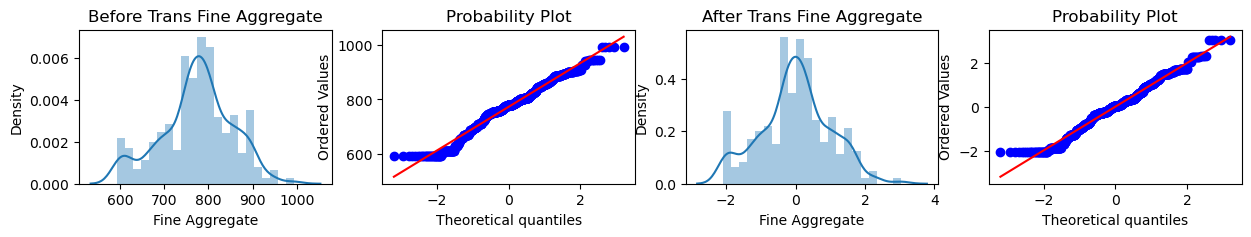

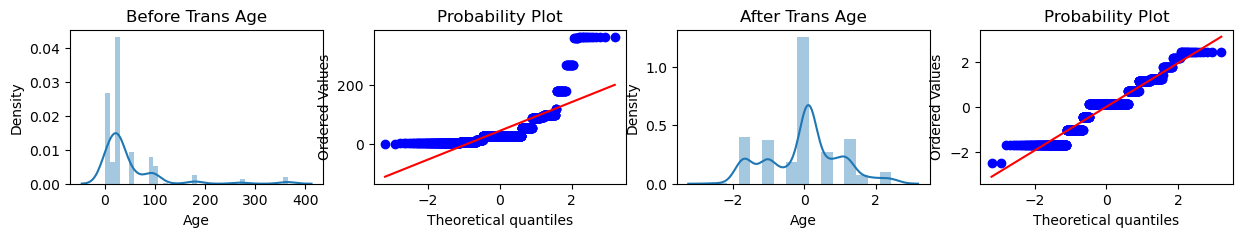

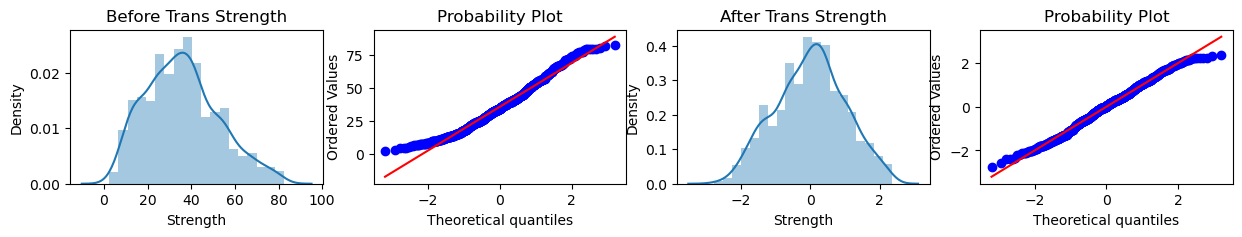

In [215]:
for col in df.columns:
    plt.figure(figsize=(15,2))
    plt.subplot(1,4,1)
    plt.title("Before Trans "+col)
    sns.distplot(df[col])

    plt.subplot(1,4,2)
    plt.title("Before Trans Q-Q "+col)
    stats.probplot(df[col],dist='norm',plot=plt)

    plt.subplot(1,4,3)
    plt.title("After Trans "+col)
    sns.distplot(df_box_cox[col])

    plt.subplot(1,4,4)
    plt.title("After Trans Q-Q "+col)
    stats.probplot(df_box_cox[col],dist='norm',plot=plt)


In [229]:
pt_yeo = PowerTransformer(method='yeo-johnson')

df_yeo = pd.DataFrame(pt_yeo.fit_transform(df),columns=df.columns)


C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_17788\2414840414.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_box_cox[col])
C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_17788\2414840414.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_yeo[col])
C:\Users\lab4.LAB4PR\AppDat

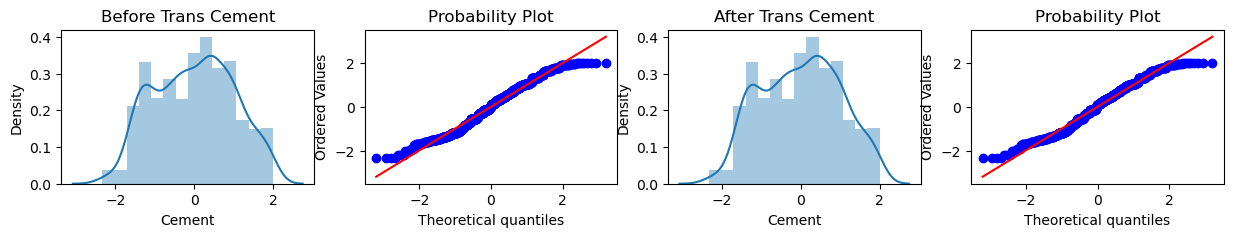

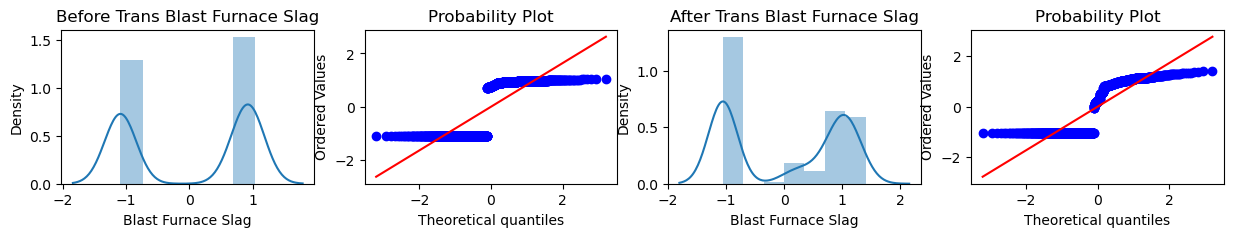

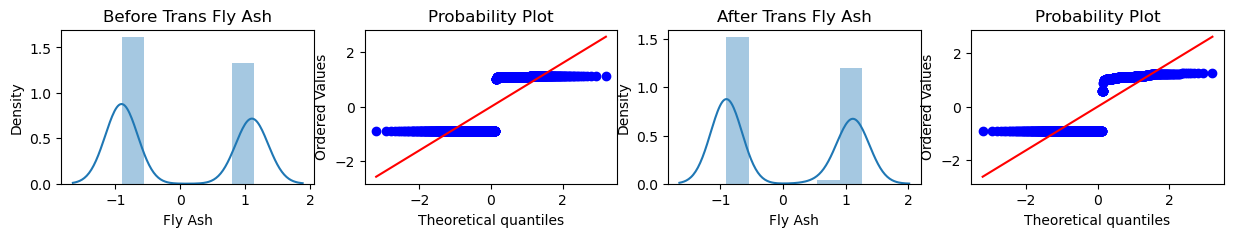

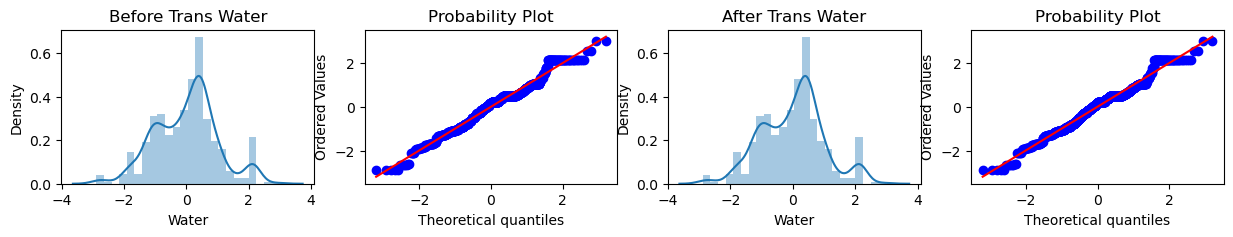

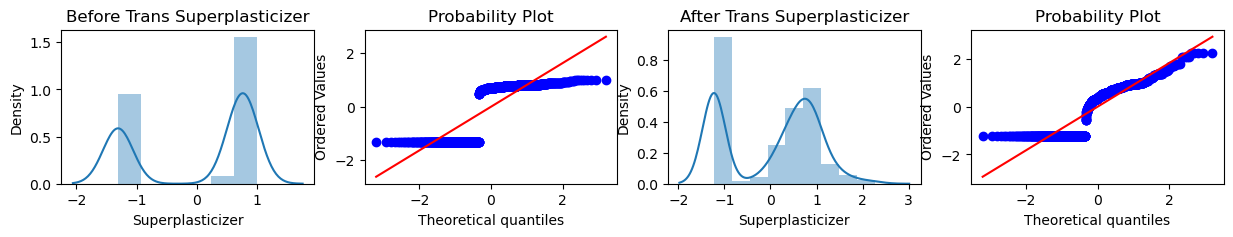

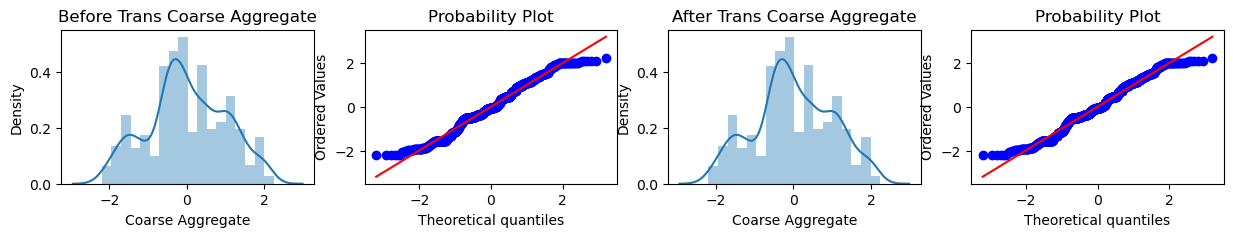

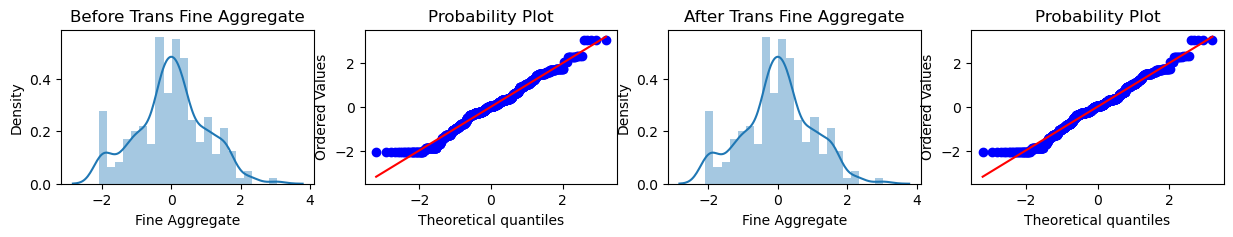

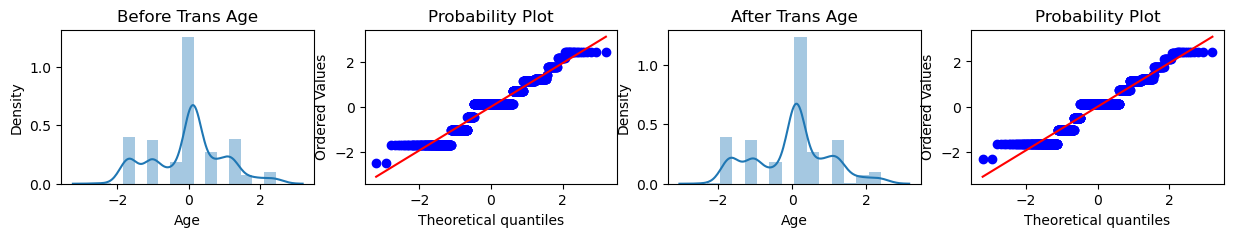

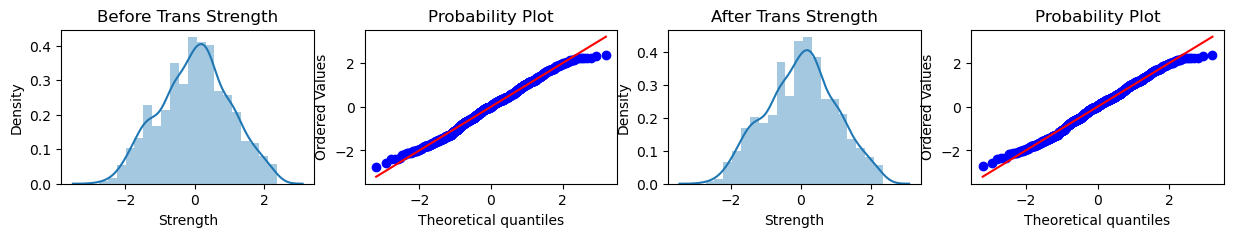

In [231]:
for col in df.columns:
    plt.figure(figsize=(15,2))
    plt.subplot(1,4,1)
    plt.title("Before Trans "+col)
    sns.distplot(df_box_cox[col])

    plt.subplot(1,4,2)
    plt.title("Before Trans Q-Q "+col)
    stats.probplot(df_box_cox[col],dist='norm',plot=plt)

    plt.subplot(1,4,3)
    plt.title("After Trans "+col)
    sns.distplot(df_yeo[col])

    plt.subplot(1,4,4)
    plt.title("After Trans Q-Q "+col)
    stats.probplot(df_yeo[col],dist='norm',plot=plt)
